**A short tutorial using Rasterio in Python**

**Rasterio**  (_description from ChatGPT4o_)


# Install/Load Rasterio

I will show you how to Install Rasterio, and then load it to use in python.

Install `Rasterio` using pip. 

This line of code below is commented out because if you have 
loaded the environment from the environment file (ATUR-WIKI.yml) they should already be installed.
If you have not loaded the environment or want to create your own
uncomment the line below and run it

In [3]:
#| echo = false

#!pip install rasterio


# Load rasterio


In [5]:
import rasterio
from rasterio.plot import show

# Open a Raster dataset from a URL using Rasterio

In [7]:
# URL of the .tif file. URL to 1/3 arcsecond (10m) National Elevation Dataset DEM 
tif_url = 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n35w111/USGS_1_n35w111_20240402.tif'

# Open the raster
dataset = rasterio.open(tif_url)

## Display basic metadata

In [8]:
print(f"CRS: {dataset.crs}")  # Coordinate Reference System
print(f"Bounds: {dataset.bounds}")  # Spatial extent of the raster
print(f"Width: {dataset.width}, Height: {dataset.height}")  # Dimensions
print(f"Number of bands: {dataset.count}")

CRS: EPSG:4269
Bounds: BoundingBox(left=-111.00166666698249, bottom=33.998333332817936, right=-109.99833333361585, top=35.001666667083896)
Width: 3612, Height: 3612
Number of bands: 1


# Reading the Raster Data as a NumPyArray

In [9]:
# read the first band (assuming a single-band raster)
band1 = dataset.read(1)

# Display the shape and basic statistics
print(f"Band 1 shape: {band1.shape}")
print(f"Min: {band1.min()}, Max: {band1.max()}")

Band 1 shape: (3612, 3612)
Min: 1324.57958984375, Max: 2410.233154296875


# Visualizing the Raster using Matplotlib

Rasterio integrates well with `matplotlib` for visualizing raster data

If matplotlib is not installed (i.e. you get an error when you run the next line) use `!pip install matplotlib`

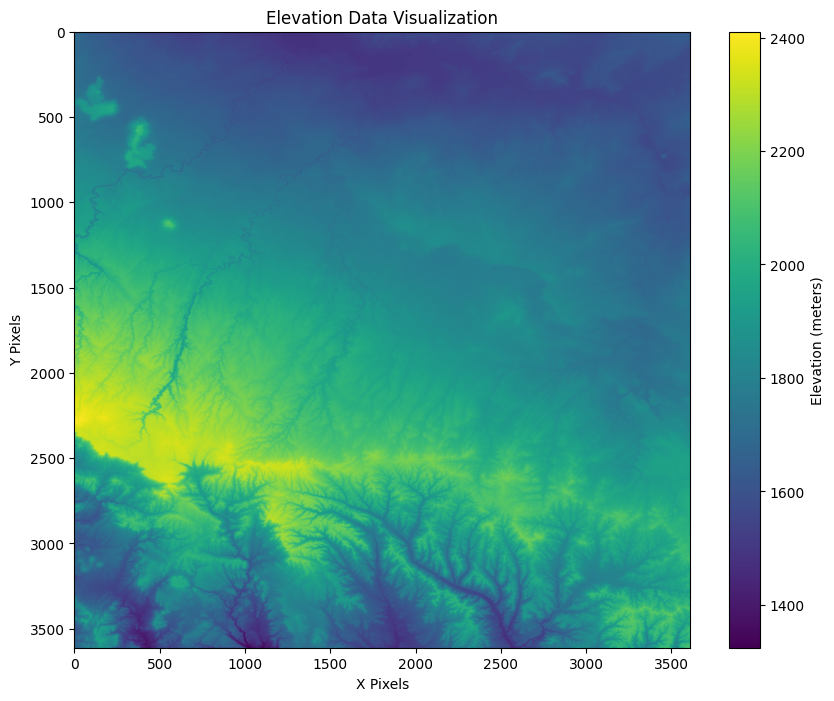

In [11]:
# import the matplotlib library.
import matplotlib.pyplot as plt

# Plot the raster data using matplotlib and the  viridis colormap

plt.figure(figsize=(10, 8))
plt.imshow(band1, cmap='viridis')
plt.colorbar(label='Elevation (meters)')
plt.title('Elevation Data Visualization')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.show()

# Accessing Raster Metadata

Rasterio provides easy access to import metadata like the transform, resolution, and affine transformations

In [12]:
# Get the affine transform (maps pixel coordinates to geographic coordinates)
print(f"Affine transform: {dataset.transform}")

# Get the resolution (pixel size)
print(f"Pixel resolution: {dataset.res}")


Affine transform: | 0.00, 0.00,-111.00|
| 0.00,-0.00, 35.00|
| 0.00, 0.00, 1.00|
Pixel resolution: (0.000277777777786999, 0.00027777777803598015)


# Extracting Specific Pixel Values

You can extract specific pixel values or geographic locations easily with `Rasterio`


In [13]:
# Example: Extract the value at pixel (500, 500)
row, col = 500, 500
value = band1[row, col]
print(f"Value at pixel (500, 500): {value}")

# Convert pixel coordinates to geographic coordinates
geo_coords = dataset.xy(row, col)
print(f"Geographic coordinates: {geo_coords}")


Value at pixel (500, 500): 1695.1978759765625
Geographic coordinates: (np.float64(-110.8626388892001), np.float64(34.862638889176885))


# Writing Data to New COG

**Key Options:**

* `driver='COG'`: This specifies that the output file should be in Cloud Optimized GeoTIFF format.

* `BLOCKSIZE=512`: This sets the internal tile size (512x512 pixels).

* `compress='LZW'`: This applies LZW compression to reduce the file size.

* `overview_resampling='nearest'`: This generates overviews using nearest-neighbor resampling, which speeds up access at different zoom levels.

In [14]:
# Define the output path for the COG
output_cog_path = 'output_cog.tif'

# Write the data to a new COG file
with rasterio.open(
    output_cog_path, 'w',
    driver='COG',  # Set driver to COG
    height=band1.shape[0],
    width=band1.shape[1],
    count=1,  # Number of bands
    dtype=band1.dtype,
    crs=dataset.crs,
    transform=dataset.transform,
    BLOCKSIZE=512,  # Set block size for tiling
    compress='LZW',  # Compression to reduce file size
    overview_resampling='nearest'  # Generate overviews for faster access at multiple zoom levels
) as dst:
    dst.write(band1, 1)  # Write the data to the first band

print(f"COG created and saved at: {output_cog_path}")


COG created and saved at: output_cog.tif


# close the dataset

lets free up the RAM by closing this dataset now that we are done.

In [15]:

dataset.close()